Responsible AI - Project on algorithmic fairness

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
# read data from csv file
df = pd.read_csv('data/catalan-juvenile-recidivism-subset.csv')

In [171]:
df.head()

,id,V1_sex,V4_area_origin,V6_province,V8_age,V9_age_at_program_end,V11_criminal_record,V12_n_criminal_record,V13_n_crime_cat,V15_main_crime_cat,...,V28_days_from_crime_to_program,V29_program_duration,V115_RECID2015_recid,V10_date_of_birth_year,V10_date_of_birth_month,V22_main_crime_date_year,V22_main_crime_date_month,V30_program_start_year,V30_program_start_month,V31_program_end_month
0,691,male,Spain,Lleida,15,17,1,1-2,3+,Against People,...,587.0,132,1,1992,11,2008,8,2010,4,8
1,956,female,Spain,Barcelona,14,15,1,1-2,2,Against People,...,107.0,258,1,1995,7,2009,8,2009,12,8
2,2560,male,Maghreb,Barcelona,15,16,1,3-5,3+,Against People,...,135.0,85,1,1994,1,2009,11,2010,3,6
3,2018,male,Maghreb,Girona,14,15,1,5+,2,Against People,...,176.0,271,1,1994,4,2009,1,2009,6,3
4,1650,male,Spain,Tarragona,17,20,1,5+,3+,Against People,...,261.0,533,1,1990,9,2008,9,2009,5,11


In [172]:
# create profile report
import pandas as pd
from pandas_profiling import ProfileReport

# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile.to_file(output_file='output.html')


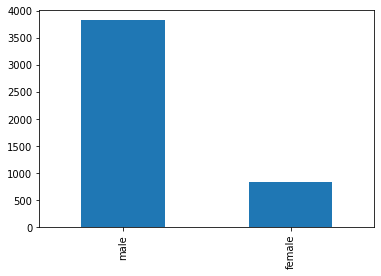

In [173]:
# some highlits from the report

# plot sex distribution
_=df.V1_sex.value_counts().plot(kind='bar')

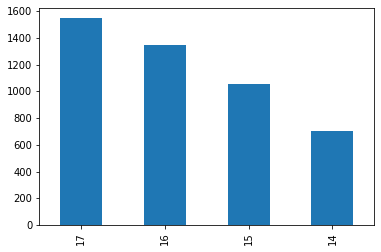

In [174]:
# plot area of origin distribution
_=df.V8_age.value_counts().plot(kind='bar')

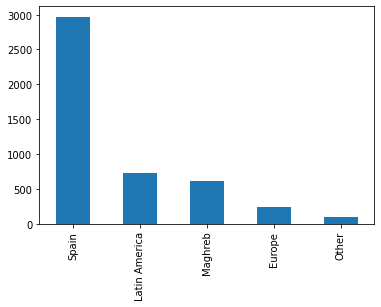

In [175]:
_=df.V4_area_origin.value_counts().plot(kind='bar')

## Training

Split the dataset into training, validation and test sets, and train a machine
learning algorithm of your choice to predict the variable Recidivism

In [176]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [177]:
X = df.drop(columns=["V115_RECID2015_recid", "id"])
y = df.V115_RECID2015_recid # Target variable

In [178]:
# apply one hot encoding to categorical features
X = pd.get_dummies(X, columns=[col for col in X.columns if X[col].dtype == "object"])

In [179]:
X.head(10)

,V8_age,V9_age_at_program_end,V11_criminal_record,V16_violent_crime,V17_crime_classification,V20_n_juvenile_records,V21_n_crime,V28_days_from_crime_to_program,V29_program_duration,V10_date_of_birth_year,...,V24_finished_program_Tractament terapèutic ambulatori,V26_finished_measure_grouped_ATM,V26_finished_measure_grouped_Community Service,V26_finished_measure_grouped_Internment,V26_finished_measure_grouped_MRM,V26_finished_measure_grouped_Other,V26_finished_measure_grouped_Probation,V27_program_duration_cat_6 months < 1 year,V27_program_duration_cat_<6 months,V27_program_duration_cat_>1 year
0,15,17,1,1,1,1.0,4,587.0,132,1992,...,0,0,0,1,0,0,0,0,1,0
1,14,15,1,1,1,1.0,2,107.0,258,1995,...,0,0,0,1,0,0,0,1,0,0
2,15,16,1,1,1,4.0,3,135.0,85,1994,...,0,0,0,1,0,0,0,0,1,0
3,14,15,1,1,1,7.0,2,176.0,271,1994,...,0,0,0,1,0,0,0,1,0,0
4,17,20,1,1,1,6.0,3,261.0,533,1990,...,0,0,0,1,0,0,0,0,0,1
5,16,18,1,1,1,1.0,1,420.0,212,1992,...,0,0,0,0,0,0,1,1,0,0
6,17,19,1,1,0,3.0,4,547.0,118,1990,...,0,0,0,0,0,0,1,0,1,0
7,14,16,1,1,0,7.0,1,367.0,271,1994,...,0,0,0,0,0,0,1,1,0,0
8,17,19,1,1,0,6.0,1,541.0,302,1990,...,0,0,0,0,0,0,1,1,0,0
9,17,17,1,1,1,4.0,1,109.0,29,1992,...,0,1,0,0,0,0,0,0,1,0


In [180]:
# Split dataset into training set and test set  # 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [196]:
# import sklearn random forest
from sklearn.ensemble import RandomForestClassifier

# Create Decision Tree classifer object
clf = RandomForestClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [197]:
# get probabilities from clf
y_pred_proba = clf.predict_proba(X_test)

In [198]:
y_pred_proba

array([[0.62, 0.38],
       [0.88, 0.12],
       [0.57, 0.43],
       ...,
       [0.63, 0.37],
       [0.68, 0.32],
       [0.87, 0.13]])

In [199]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7306590257879656


Please design your own criteria for diagnosing the three main definitions
of fairness: Independence, Separation and Sufficiency. Use your criteria to
perform a diagnostic test of your algorithm with respect to sensitive groups
such as race and/or gender. Please describe your designed diagnostic
criteria, as well as the results of your test. The rest of the project will be
most interesting if you have picked a classifier where you observe unfairness
at this point.

In [200]:
### Attributes to test
Sex: \
'V1_sex_female' \
'V1_sex_male' 

Origin: \
'V4_area_origin_Europe' \
V4_area_origin_Latin America'\
'V4_area_origin_Maghreb'\
'V4_area_origin_Other'

Age:\
'V8_age_14' \
'V8_age_15' \
'V8_age_16' \
'V8_age_17' 



,V8_age,V9_age_at_program_end,V11_criminal_record,V16_violent_crime,V17_crime_classification,V20_n_juvenile_records,V21_n_crime,V28_days_from_crime_to_program,V29_program_duration,V10_date_of_birth_year,...,V24_finished_program_Tractament terapèutic ambulatori,V26_finished_measure_grouped_ATM,V26_finished_measure_grouped_Community Service,V26_finished_measure_grouped_Internment,V26_finished_measure_grouped_MRM,V26_finished_measure_grouped_Other,V26_finished_measure_grouped_Probation,V27_program_duration_cat_6 months < 1 year,V27_program_duration_cat_<6 months,V27_program_duration_cat_>1 year
0,15,17,1,1,1,1.0,4,587.0,132,1992,...,0,0,0,1,0,0,0,0,1,0
1,14,15,1,1,1,1.0,2,107.0,258,1995,...,0,0,0,1,0,0,0,1,0,0
2,15,16,1,1,1,4.0,3,135.0,85,1994,...,0,0,0,1,0,0,0,0,1,0
3,14,15,1,1,1,7.0,2,176.0,271,1994,...,0,0,0,1,0,0,0,1,0,0
4,17,20,1,1,1,6.0,3,261.0,533,1990,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4647,16,17,0,0,1,0.0,1,91.0,125,1992,...,0,0,0,0,1,0,0,0,1,0
4648,17,18,0,0,1,0.0,2,39.0,41,1992,...,0,0,0,0,1,0,0,0,1,0
4649,17,18,0,0,1,0.0,1,94.0,38,1992,...,0,0,0,0,1,0,0,0,1,0
4650,17,17,0,0,1,0.0,1,86.0,119,1992,...,0,0,0,0,1,0,0,0,1,0


## Independence

In [201]:
# test independence of the model
def test_independence(model,X, a, b, allowed_err=0):
    # y is the target variable
    # X is the feature matrix
    # a is the column for the first group
    # b is the column for the second group
    # for both grouqps a and b, the values are 0 or 1 (one-hot encoding)

    # create two groups
    X_a = X[X[a]==1]
    X_b = X[X[b]==1]

    # check prediction for group a and b
    y_pred_a = model.predict(X_a)
    y_pred_b = model.predict(X_b)

    # calculate p(y_pred=1|A=a) and p(y_pred=1|A=b)
    p_a = np.mean(y_pred_a)
    p_b = np.mean(y_pred_b)

    #print results
    print(f"p(y_pred=1|A={a}) = {p_a:.3f}")
    print(f"p(y_pred=1|A={b}) = {p_b:.3f}")

    if abs(p_a - p_b) <= allowed_err:
        print("The model fulfills independence")
    else:
        print("The model does not fulfill independence")

    return p_a, p_b


In [205]:
test_independence(clf,X, "V1_sex_male", "V1_sex_female", allowed_err=0.05)

p(y_pred=1|A=V1_sex_male) = 0.339
p(y_pred=1|A=V1_sex_female) = 0.157
The model does not fulfill independence


(0.3686551543694401, 0.2216867469879518)

comment: the model discriminates males

In [206]:
# test seperation of the model
def test_seperation(model,X, y, a, b, allowed_err=0):
    # y is the target variable
    # X is the feature matrix
    # a is the column for the first group
    # b is the column for the second group
    # for both grouqps a and b, the values are 0 or 1 (one-hot encoding)

    # create four groups
    X_1_a = X[(X[a]==1) & (y==1)]
    X_1_b = X[(X[b]==1) & (y==1)]
    X_0_a = X[(X[a]==1) & (y==0)]
    X_0_b = X[(X[b]==1) & (y==0)]

    # check prediction all groups
    y_pred_1_a = model.predict(X_1_a)
    y_pred_1_b = model.predict(X_1_b)
    y_pred_0_a = model.predict(X_0_a)
    y_pred_0_b = model.predict(X_0_b)

    # calculate p(y_pred=1|Y=1, A=a) and p(y_pred=1|Y=1, A=b) etc
    p_1_a = np.mean(y_pred_1_a)
    p_1_b = np.mean(y_pred_1_b)
    p_0_a = np.mean(y_pred_0_a)
    p_0_b = np.mean(y_pred_0_b)

    #print results
    print(f"p(y_pred=1|Y=1, A={a}) = {p_1_a:.3f}")
    print(f"p(y_pred=1|Y=1, A={b}) = {p_1_b:.3f}")
    print(f"p(y_pred=1|Y=0, A={a}) = {p_0_a:.3f}")
    print(f"p(y_pred=1|Y=0, A={b}) = {p_0_b:.3f}")

    if abs(p_1_a - p_1_b) <= allowed_err and abs(p_0_a - p_0_b) <= allowed_err:
        print("The model fulfills seperation")
    else:
        print("The model does not fulfill seperation")

    return p_1_a, p_1_b, p_0_a, p_0_b

In [207]:
test_seperation(clf,X,y, "V1_sex_male", "V1_sex_female", allowed_err=0.05)

p(y_pred=1|Y=1, A=V1_sex_male) = 0.841
p(y_pred=1|Y=1, A=V1_sex_female) = 0.718
p(y_pred=1|Y=0, A=V1_sex_male) = 0.040
p(y_pred=1|Y=0, A=V1_sex_female) = 0.012
The model does not fulfill seperation


In [97]:
_=test_seperation(clf,X,y, 'V8_age_14', 'V8_age_15')
_=test_seperation(clf,X,y, 'V8_age_16', 'V8_age_17')

p(y_pred=1|Y=1, A=V8_age_14) =  0.8412698412698413
p(y_pred=1|Y=1, A=V8_age_15) =  0.8401937046004843
p(y_pred=1|Y=0, A=V8_age_14) =  0.1282051282051282
p(y_pred=1|Y=0, A=V8_age_15) =  0.084375
The model does not fulfill seperation
p(y_pred=1|Y=1, A=V8_age_16) =  0.870020964360587
p(y_pred=1|Y=1, A=V8_age_17) =  0.8149100257069408
p(y_pred=1|Y=0, A=V8_age_16) =  0.09101382488479262
p(y_pred=1|Y=0, A=V8_age_17) =  0.056896551724137934
The model does not fulfill seperation


In [98]:
_=test_seperation(clf,X,y, 'V4_area_origin_Europe', 'V4_area_origin_Latin America')
_=test_seperation(clf,X,y, 'V4_area_origin_Maghreb', 'V4_area_origin_Other')

p(y_pred=1|Y=1, A=V4_area_origin_Europe) =  0.9156626506024096
p(y_pred=1|Y=1, A=V4_area_origin_Latin America) =  0.8853046594982079
p(y_pred=1|Y=0, A=V4_area_origin_Europe) =  0.11180124223602485
p(y_pred=1|Y=0, A=V4_area_origin_Latin America) =  0.06919642857142858
The model does not fulfill seperation
p(y_pred=1|Y=1, A=V4_area_origin_Maghreb) =  0.9111111111111111
p(y_pred=1|Y=1, A=V4_area_origin_Other) =  0.875
p(y_pred=1|Y=0, A=V4_area_origin_Maghreb) =  0.1423728813559322
p(y_pred=1|Y=0, A=V4_area_origin_Other) =  0.06666666666666667
The model does not fulfill seperation
